In [1]:
import numpy as np
import pandas as pd
import os

# csv 파일 불러오기 

In [2]:
os.chdir(path='D:/Documents/StudyData/depression/schaefer100/filtered/')  

file_list = os.listdir(os.getcwd()) # 폴더 내의 파일 리스트를 읽어 file_list에 저장
file_list_csv = [file for file in file_list if file.endswith(".csv")]

In [3]:
file_list_csv

['YAD10004.schaefer100-yeo17_filtered.csv',
 'YAD10005.schaefer100-yeo17_filtered.csv',
 'YAD10006.schaefer100-yeo17_filtered.csv',
 'YAD10008.schaefer100-yeo17_filtered.csv',
 'YAD10009.schaefer100-yeo17_filtered.csv',
 'YAD10011.schaefer100-yeo17_filtered.csv',
 'YAD10014.schaefer100-yeo17_filtered.csv',
 'YAD10015.schaefer100-yeo17_filtered.csv',
 'YAD10016.schaefer100-yeo17_filtered.csv',
 'YAD10020.schaefer100-yeo17_filtered.csv',
 'YAD10024.schaefer100-yeo17_filtered.csv',
 'YAD10025.schaefer100-yeo17_filtered.csv',
 'YAD10026.schaefer100-yeo17_filtered.csv',
 'YAD10027.schaefer100-yeo17_filtered.csv',
 'YAD10028.schaefer100-yeo17_filtered.csv',
 'YAD10029.schaefer100-yeo17_filtered.csv',
 'YAD10030.schaefer100-yeo17_filtered.csv',
 'YAD10032.schaefer100-yeo17_filtered.csv',
 'YAD10033.schaefer100-yeo17_filtered.csv',
 'YAD10035.schaefer100-yeo17_filtered.csv',
 'YAD10036.schaefer100-yeo17_filtered.csv',
 'YAD10039.schaefer100-yeo17_filtered.csv',
 'YAD10040.schaefer100-yeo17_fil

### 여러 csv파일을 한번에 가져와서 dataframe으로 저장하고, data크기(행 x 열) 확인하기 

In [4]:
nSub = len(file_list_csv)
for i in range(0, nSub):
    globals()['df{}'.format(i)] = pd.read_csv(file_list_csv[i], header=None)

timepoint = df0.shape[1]   # == len(df0.columns)
nROI = df0.shape[0]
print(nSub)
print(timepoint)
print(nROI)

57
240
100


### 각 dataframe에서 원하는 row 추출하기

In [5]:
for i in range(0, nSub):
    globals()['AIC_rt{}'.format(i)] = globals()['df{}'.format(i)].loc[71]  # df{}의 71번째 row 추출 : (72번째 ROI인 right AIC의 데이터 -> 0부터이므로 순서는 71번째)
    globals()['AIC_lt{}'.format(i)] = globals()['df{}'.format(i)].loc[21]
    globals()['mPFC_rt{}'.format(i)] = globals()['df{}'.format(i)].loc[39]
    globals()['mPFC_lt{}'.format(i)] = globals()['df{}'.format(i)].loc[91]

In [6]:
AIC_rt0.shape # 세로로 긴 배열

(240,)

### 여러 dataframe 합치기(수직으로 쌓기(axis = 0) vs 수평으로 잇기(axis = 1))

In [7]:
# 빈 데이터프레임 생성
AIC_rt = pd.DataFrame((timepoint,))
AIC_lt = pd.DataFrame((timepoint,))
mPFC_rt = pd.DataFrame((timepoint,))
mPFC_lt = pd.DataFrame((timepoint,))

In [8]:
for i in range(0, nSub):
    AIC_rt = pd.concat([AIC_rt, globals()['AIC_rt{}'.format(i)]], ignore_index=True, axis=1)
    AIC_lt = pd.concat([AIC_lt, globals()['AIC_lt{}'.format(i)]], ignore_index=True, axis=1)
    mPFC_rt = pd.concat([mPFC_rt, globals()['mPFC_rt{}'.format(i)]], ignore_index=True, axis=1)
    mPFC_lt = pd.concat([mPFC_lt, globals()['mPFC_lt{}'.format(i)]], ignore_index=True, axis=1)

AIC_rt = AIC_rt.drop(0, axis=1)   #  0번째 열에 난수가 들어가기 때문에 지워주어야 함.
AIC_lt = AIC_lt.drop(0, axis=1)
mPFC_rt = mPFC_rt.drop(0, axis=1)
mPFC_lt = mPFC_lt.drop(0, axis=1)

In [9]:
AIC_rt.shape 

(240, 57)

In [10]:
AIC_rt

,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
0,-2.3021,1.3924,2.8651,5.0285,-0.7273,-3.05540,3.4753,5.59660,0.78525,-2.7312,...,-0.32329,3.5350,-8.0532,-1.29100,1.4860,1.6708,0.40317,1.6171,13.4550,-0.60560
1,-14.6280,8.4181,136.5300,19.3810,26.2680,-22.49500,46.9170,-27.68500,-47.82300,51.6310,...,41.01500,33.0820,313.2600,11.92800,1.2596,11.0600,-19.95900,-8.8519,-132.8300,84.66800
2,-79.5640,-27.9220,166.9200,40.3820,-21.9830,-43.66100,-18.6110,-7.73270,-76.97800,9.8494,...,13.22900,-53.0210,280.9300,0.58094,-58.5520,-16.9690,12.61200,-2.7941,-96.9330,53.16000
3,-79.6710,34.5170,-145.5000,76.2230,-60.8260,-50.42500,-36.6480,7.61170,-37.97200,-5.0189,...,55.33100,-15.5520,304.6300,-18.96700,-104.0900,-2.5569,41.19400,26.2790,-53.9340,0.47912
4,-49.7950,84.1740,-256.3300,97.3720,19.8870,-12.54000,-49.6220,7.61510,-57.47600,23.8930,...,31.52900,48.3120,282.8400,-21.44600,-76.3740,-12.2360,62.55200,16.8610,6.4155,-28.56000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-30.7100,-35.9130,-25.9550,-197.8900,-19.1970,64.66400,34.9390,0.24147,58.44600,65.2420,...,64.49400,-55.2460,-97.8250,-16.12400,9.9331,-37.2790,-23.72600,-91.4110,11.3380,-117.08000
236,-6.8396,-76.6400,-53.9810,-163.9100,-56.9980,67.26500,42.7810,-42.16200,79.08900,118.8300,...,48.39900,-40.4670,-72.0070,-17.97900,-4.7044,-49.1460,-15.16100,-92.5790,59.6920,-75.61500
237,-33.2400,-89.4060,-47.1960,-157.4100,-133.0600,37.49900,55.4730,-471.51000,58.40700,105.0300,...,38.09000,28.9430,-42.9440,38.91200,31.6130,-25.9710,-37.84000,-40.7860,39.3860,-56.69300
238,-29.2000,-14.2210,-35.3920,-120.4300,-99.3890,-0.53328,28.9320,-174.17000,-10.94700,31.1760,...,12.36800,35.9690,-18.9840,50.49400,9.8296,5.9757,-40.29800,-5.6245,50.9500,-10.18600


#### 평균 계산하기

In [11]:
AIC_rt_mean = AIC_rt.mean(axis=1) # 1 == 'columns' 열들의 값의 평균을 구하는 것 
AIC_lt_mean = AIC_lt.mean(axis=1)
mPFC_rt_mean = mPFC_rt.mean(axis=1)
mPFC_lt_mean = mPFC_lt.mean(axis=1)

# 도표 그리기 

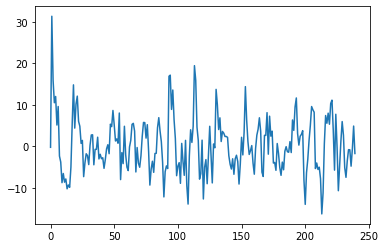

In [12]:
import matplotlib.pyplot as plt
# 하나 그리기
plt.plot(AIC_lt_mean)

##### 여러개 그리기

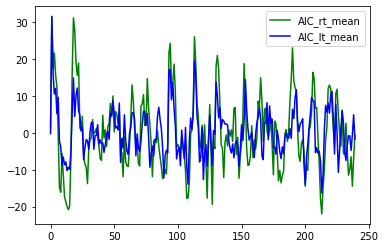

In [13]:
plt.plot(AIC_rt_mean, 'g', AIC_lt_mean, 'b')

plt.legend(('AIC_rt_mean','AIC_lt_mean'))

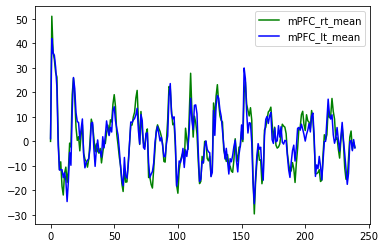

In [14]:
plt.plot(mPFC_rt_mean, 'g', mPFC_lt_mean, 'b')
plt.legend(('mPFC_rt_mean','mPFC_lt_mean'))

#### Dataframe 열추출
###### timepoint [13:119]은 loss task를 진행하였고, [126:232]은 reward task를 진행하였다.
###### 두 task에서의 차이를 보고 싶은데..

In [15]:
AIC_rt_loss = AIC_rt.T.loc[:,13:119]   # subject x time 형태로 보고 싶어서 transpose 시켜준다음 열 추출함.
AIC_lt_loss = AIC_lt.T.loc[:,13:119]   # 열 추출은 행추출 때와는 달리 앞에 :,를 더해줘야함.
AIC_rt_reward = AIC_rt.T.loc[:,126:232]
AIC_lt_reward = AIC_lt.T.loc[:,126:232]

mPFC_rt_loss = mPFC_rt.T.loc[:,13:119]
mPFC_lt_loss = mPFC_lt.T.loc[:,13:119]
mPFC_rt_reward = mPFC_rt.T.loc[:,126:232]
mPFC_lt_reward = mPFC_lt.T.loc[:,126:232]

In [16]:
AIC_rt_loss.shape

(57, 107)

In [17]:
AIC_rt_loss_mean = AIC_rt_loss.mean(axis=0)  # subject가 행에 가있으니까 평균도 행 값들에 대해서 계산해주기
AIC_lt_loss_mean = AIC_lt_loss.mean(axis=0)   
AIC_rt_reward_mean = AIC_rt_reward.mean(axis=0)
AIC_lt_reward_mean = AIC_lt_reward.mean(axis=0)

mPFC_rt_loss_mean = mPFC_rt_loss.mean(axis=0)
mPFC_lt_loss_mean = mPFC_lt_loss.mean(axis=0)
mPFC_rt_reward_mean = mPFC_rt_reward.mean(axis=0)
mPFC_lt_reward_mean = mPFC_lt_reward.mean(axis=0)

##### subplot으로 한 그림에 여러개 그래프 그리기 


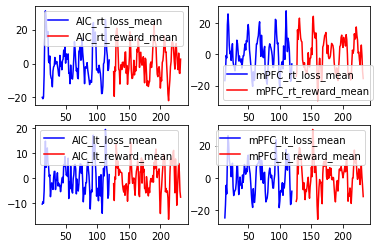

In [18]:
# 그래프 그리기
plt.subplot(2,2,1)  # 행 갯수, 열 갯수, 인덱스 => 2x2개를 그릴건데, 일단 1번째 칸에다 그리겠다.
plt.plot(AIC_rt_loss_mean, 'b', AIC_rt_reward_mean, 'r')
plt.legend(('AIC_rt_loss_mean','AIC_rt_reward_mean'))

plt.subplot(2,2,2)
plt.plot(mPFC_rt_loss_mean, 'b', mPFC_rt_reward_mean, 'r')
plt.legend(('mPFC_rt_loss_mean','mPFC_rt_reward_mean'))

plt.subplot(2,2,3) 
plt.plot(AIC_lt_loss_mean, 'b', AIC_lt_reward_mean, 'r')
plt.legend(('AIC_lt_loss_mean','AIC_lt_reward_mean'))

plt.subplot(2,2,4)
plt.plot(mPFC_lt_loss_mean, 'b', mPFC_lt_reward_mean, 'r')
plt.legend(('mPFC_lt_loss_mean','mPFC_lt_reward_mean'))

##### 시간 순서대로 그려졌다. 내가 원하는 그림이 아닌데..
###### plotting을 할 때 x축 값을 넣어주면 됨

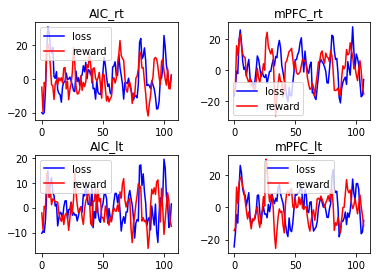

In [19]:
# 그래프 그리기
x = np.arange(0, len(AIC_rt_loss_mean))   ## == AIC_rt_loss_mean.shape[0]

plt.subplot(2,2,1)  # 행 갯수, 열 갯수, 인덱스 => 2x2개를 그릴건데, 일단 1번째 칸에다 그리겠다.
plt.plot(x,AIC_rt_loss_mean, 'b', x,AIC_rt_reward_mean, 'r')
plt.title('AIC_rt')
plt.legend(('loss','reward'))

plt.subplot(2,2,2)
plt.plot(x,mPFC_rt_loss_mean, 'b', x,mPFC_rt_reward_mean, 'r')
plt.title('mPFC_rt')
plt.legend(('loss','reward'))

plt.subplot(2,2,3) 
plt.plot(x,AIC_lt_loss_mean, 'b', x,AIC_lt_reward_mean, 'r')
plt.title('AIC_lt')
plt.legend(('loss','reward'))

plt.subplot(2,2,4)
plt.plot(x,mPFC_lt_loss_mean, 'b', x,mPFC_lt_reward_mean, 'r')
plt.title('mPFC_lt')
plt.legend(('loss','reward'))

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.35) # 제목을 쓰면서 위아래 plot이 겹치는 걸 해결하기 위해 추가함


###### plot만 봐서는 loss와 reward에서 bold signal의 차이가 있는지 잘 모르겠음
###### 통계를 통해 비교해야 함

###### 그림은 어쨌건 평균값으로만 비교를 한것이고, 실제 피험자 그룹의 loss 값과 reward 값에서 차이가 있는가를 비교하려면, Nsub 만큼의 
###### 비교 샘플이 있는 것. 대신 한 사람의 loss와 reward를 비교해야 하므로 paired t-test를 쓰면 좋을 것 같다. 
###### 일단은 한 사람에게서 각각 loss와 reward에 대해 각 ROI에서 얻은 signal을 평균해 보고 비교하려함

In [20]:
AIC_rt_loss_mean_personal = AIC_rt_loss.mean(axis=1)  # subject가 행에 가있으니까 이번엔 시간에 대한 값을 평균함
AIC_lt_loss_mean_personal = AIC_lt_loss.mean(axis=1)   
AIC_rt_reward_mean_personal = AIC_rt_reward.mean(axis=1)
AIC_lt_reward_mean_personal = AIC_lt_reward.mean(axis=1)

mPFC_rt_loss_mean_personal = mPFC_rt_loss.mean(axis=1)
mPFC_lt_loss_mean_personal = mPFC_lt_loss.mean(axis=1)
mPFC_rt_reward_mean_personal = mPFC_rt_reward.mean(axis=1)
mPFC_lt_reward_mean_personal = mPFC_lt_reward.mean(axis=1)

In [21]:
AIC_rt_loss_mean_personal.shape

(57,)

In [22]:
import scipy.stats as stats 

In [23]:
paired_AIC_lt = stats.ttest_rel(AIC_lt_loss_mean_personal, AIC_lt_reward_mean_personal)
print('AIC_lt : t = %.3f, pvalue = %.3f'%paired_AIC_lt)  
paired_AIC_rt = stats.ttest_rel(AIC_rt_loss_mean_personal, AIC_rt_reward_mean_personal)
print('AIC_rt : t = %.3f, pvalue = %.3f'%paired_AIC_rt) 
paired_mPFC_lt = stats.ttest_rel(mPFC_lt_loss_mean_personal, mPFC_lt_reward_mean_personal)
print('mPFC_lt : t = %.3f, pvalue = %.3f'%paired_mPFC_lt) 
paired_mPFC_rt = stats.ttest_rel(mPFC_rt_loss_mean_personal, mPFC_rt_reward_mean_personal)
print('mPFC_rt : t = %.3f, pvalue = %.3f'%paired_mPFC_rt) 

AIC_lt : t = -0.056, pvalue = 0.955
AIC_rt : t = 0.447, pvalue = 0.656
mPFC_lt : t = -1.039, pvalue = 0.303
mPFC_rt : t = -0.722, pvalue = 0.473


=> 유의수준(alpha)을 0.01이라하면 표본의 개수 n = 57 이므로 자유도는 n-1 = 56 -> (t0.005, 56) =2.4... -> 이 값보다 t 검정통계량 값이 커야 두 대응표본 간의 차이가 유의미한 것임. [pvalue = 2xP(T>t)]

In [ ]:
function feedback_omsRoutineEachFrame() {
  return async function () {
    //--- Loop for each frame of Routine 'feedback_oms' ---
    // get current time
    t = feedback_omsClock.getTime();
    frameN = frameN + 1;// number of completed frames (so 0 is the first frame)
    // update/draw components on each frame
    
    // *feedbackMsg_2* updates
    if (t >= 0 && feedbackMsg_2.status === PsychoJS.Status.NOT_STARTED) {
      // keep track of start time/frame for later
      feedbackMsg_2.tStart = t;  // (not accounting for frame time here)
      feedbackMsg_2.frameNStart = frameN;  // exact frame index
      
      feedbackMsg_2.setAutoDraw(true);
    }

    frameRemains = 0 + dur1 - psychoJS.window.monitorFramePeriod * 0.75;  // most of one frame period left
    if (feedbackMsg_2.status === PsychoJS.Status.STARTED && t >= frameRemains) {
      feedbackMsg_2.setAutoDraw(false);
    }
    
    // *text* updates
    if (t >= 0.8 && text.status === PsychoJS.Status.NOT_STARTED) {
      // keep track of start time/frame for later
      text.tStart = t;  // (not accounting for frame time here)
      text.frameNStart = frameN;  // exact frame index
      
      text.setAutoDraw(true);
    }

    frameRemains = 0.8 + dur2 - psychoJS.window.monitorFramePeriod * 0.75;  // most of one frame period left
    if (text.status === PsychoJS.Status.STARTED && t >= frameRemains) {
      text.setAutoDraw(false);
    }
    // check for quit (typically the Esc key)
    if (psychoJS.experiment.experimentEnded || psychoJS.eventManager.getKeys({keyList:['escape']}).length > 0) {
      return quitPsychoJS('The [Escape] key was pressed. Goodbye!', false);
    }
    
    // check if the Routine should terminate
    if (!continueRoutine) {  // a component has requested a forced-end of Routine
      return Scheduler.Event.NEXT;
    }
    
    continueRoutine = false;  // reverts to True if at least one component still running
    for (const thisComponent of feedback_omsComponents)
      if ('status' in thisComponent && thisComponent.status !== PsychoJS.Status.FINISHED) {
        continueRoutine = true;
        break;
      }
    
    // refresh the screen if continuing
    if (continueRoutine) {
      return Scheduler.Event.FLIP_REPEAT;
    } else {
      return Scheduler.Event.NEXT;
    }
  };
}
